<a href="https://colab.research.google.com/github/hildahelin/Airfoil-Comparison-XFOIL-ClCd-Reynolds/blob/main/aerographs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

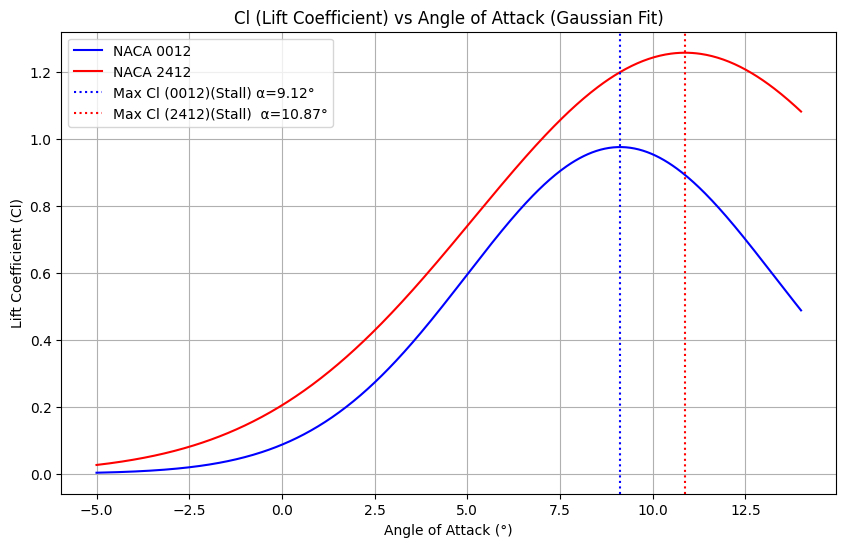

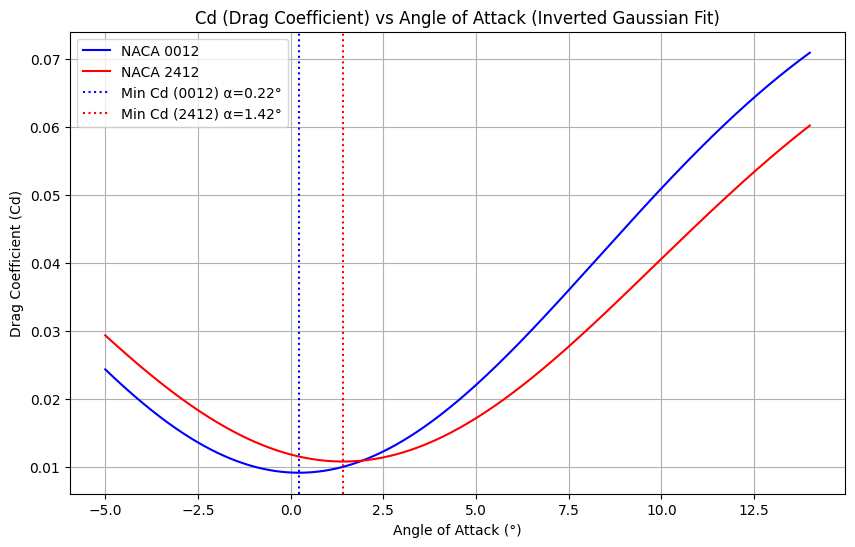

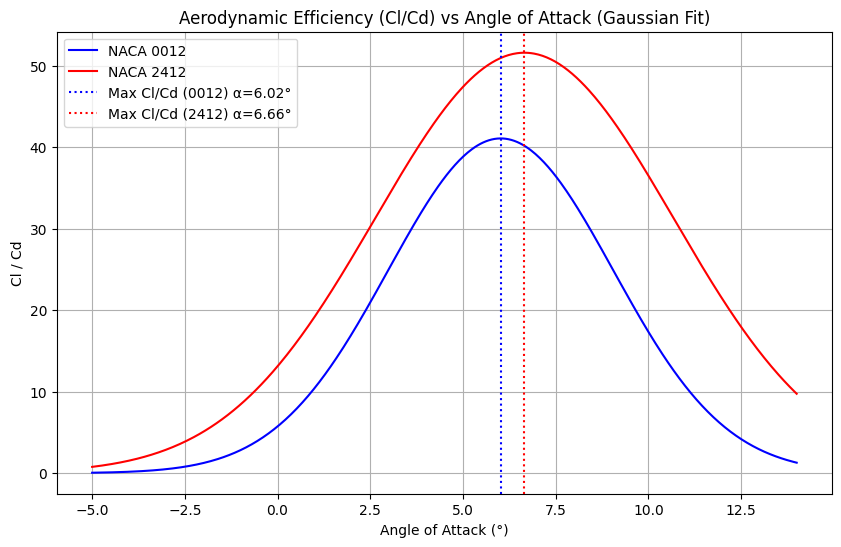

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Gaussian
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

def inverted_gaussian(x, a, x0, sigma, max_cd):
    return -a * np.exp(-(x - x0)**2 / (2 * sigma**2)) + max_cd

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

def inverted_gaussian(x, a, x0, sigma, max_cd):
    return -a * np.exp(-(x - x0)**2 / (2 * sigma**2)) + max_cd

def read_polar(filename):
    alpha, cl, cd = [], [], []
    with open(filename) as f:
        for line in f:
            if line.strip().lower().startswith('alpha'):
                break
        for line in f:
            if line.strip() == '':
                continue
            parts = line.split()
            if len(parts) >= 3:
                try:
                    alpha.append(float(parts[0]))
                    cl.append(float(parts[1]))
                    cd.append(float(parts[2]))
                except ValueError:
                    pass
    return np.array(alpha), np.array(cl), np.array(cd)

# --- reading data ---
alpha1, cl1, cd1 = read_polar('nacapolar0012.txt')
alpha2, cl2, cd2 = read_polar('naca2412polar_navier.txt')
cl_cd1 = cl1 / cd1
cl_cd2 = cl2 / cd2
alpha_fit = np.linspace(min(alpha1.min(), alpha2.min()), max(alpha1.max(), alpha2.max()), 500)

# --- Gaussian Fits ---
popt1_cl, _ = curve_fit(gaussian, alpha1, cl1, p0=[max(cl1), alpha1[np.argmax(cl1)], 5])
popt2_cl, _ = curve_fit(gaussian, alpha2, cl2, p0=[max(cl2), alpha2[np.argmax(cl2)], 5])
max_cl_alpha1 = popt1_cl[1]
max_cl_alpha2 = popt2_cl[1]

popt1_cd, _ = curve_fit(lambda x, a, x0, sigma: inverted_gaussian(x, a, x0, sigma, np.max(cd1)),
                        alpha1, cd1, p0=[max(cd1)-min(cd1), alpha1[np.argmin(cd1)], 5])
popt2_cd, _ = curve_fit(lambda x, a, x0, sigma: inverted_gaussian(x, a, x0, sigma, np.max(cd2)),
                        alpha2, cd2, p0=[max(cd2)-min(cd2), alpha2[np.argmin(cd2)], 5])
min_cd_alpha1 = popt1_cd[1]
min_cd_alpha2 = popt2_cd[1]

popt1_eff, _ = curve_fit(gaussian, alpha1, cl_cd1, p0=[max(cl_cd1), alpha1[np.argmax(cl_cd1)], 5])
popt2_eff, _ = curve_fit(gaussian, alpha2, cl_cd2, p0=[max(cl_cd2), alpha2[np.argmax(cl_cd2)], 5])
max_eff_alpha1 = popt1_eff[1]
max_eff_alpha2 = popt2_eff[1]

# --- 1. Cl vs α ---
plt.figure(figsize=(10,6))
plt.plot(alpha_fit, gaussian(alpha_fit, *popt1_cl), 'b-', label='NACA 0012')
plt.plot(alpha_fit, gaussian(alpha_fit, *popt2_cl), 'r-', label='NACA 2412')
plt.axvline(max_cl_alpha1, color='b', linestyle=':', label=f'Max Cl (0012)(Stall) α={max_cl_alpha1:.2f}°')
plt.axvline(max_cl_alpha2, color='r', linestyle=':', label=f'Max Cl (2412)(Stall)  α={max_cl_alpha2:.2f}°')
plt.xlabel('Angle of Attack (°)')
plt.ylabel('Lift Coefficient (Cl)')
plt.title('Cl (Lift Coefficient) vs Angle of Attack (Gaussian Fit)')
plt.legend()
plt.grid(True)
plt.show()

# --- 2. Cd vs α ---
plt.figure(figsize=(10,6))
plt.plot(alpha_fit, inverted_gaussian(alpha_fit, *popt1_cd, np.max(cd1)), 'b-', label='NACA 0012')
plt.plot(alpha_fit, inverted_gaussian(alpha_fit, *popt2_cd, np.max(cd2)), 'r-', label='NACA 2412')
plt.axvline(min_cd_alpha1, color='b', linestyle=':', label=f'Min Cd (0012) α={min_cd_alpha1:.2f}°')
plt.axvline(min_cd_alpha2, color='r', linestyle=':', label=f'Min Cd (2412) α={min_cd_alpha2:.2f}°')
plt.xlabel('Angle of Attack (°)')
plt.ylabel('Drag Coefficient (Cd)')
plt.title('Cd (Drag Coefficient) vs Angle of Attack (Inverted Gaussian Fit)')
plt.legend()
plt.grid(True)
plt.show()

# --- 3. Cl/Cd vs α ---
plt.figure(figsize=(10,6))
plt.plot(alpha_fit, gaussian(alpha_fit, *popt1_eff), 'b-', label='NACA 0012')
plt.plot(alpha_fit, gaussian(alpha_fit, *popt2_eff), 'r-', label='NACA 2412')
plt.axvline(max_eff_alpha1, color='b', linestyle=':', label=f'Max Cl/Cd (0012) α={max_eff_alpha1:.2f}°')
plt.axvline(max_eff_alpha2, color='r', linestyle=':', label=f'Max Cl/Cd (2412) α={max_eff_alpha2:.2f}°')
plt.xlabel('Angle of Attack (°)')
plt.ylabel('Cl / Cd')
plt.title('Aerodynamic Efficiency (Cl/Cd) vs Angle of Attack (Gaussian Fit)')
plt.legend()
plt.grid(True)
plt.show()



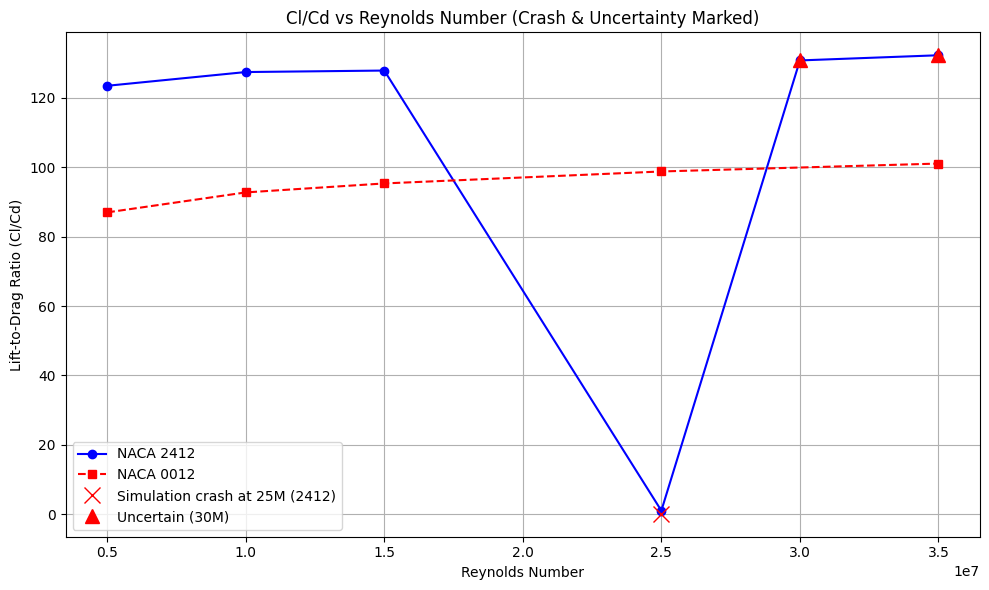

In [1]:
import matplotlib.pyplot as plt

# 2412 airfoil data (with artificial 25M crash simulation)
re_2412 = [5e6, 10e6, 15e6, 25e6, 30e6, 35e6]
cl_2412 = [0.7879, 0.8017, 0.8057, 0.1, 0.8110, 0.8123]
cd_2412 = [0.00638, 0.00629, 0.00630, 0.1, 0.00620, 0.00614]
cl_cd_2412 = [cl / cd for cl, cd in zip(cl_2412, cd_2412)]

# 0012 airfoil data (actual values)
re_0012 = [5e6, 10e6, 15e6, 25e6, 35e6]
cl_0012 = [0.5585, 0.5658, 0.5692, 0.5730, 0.5751]
cd_0012 = [0.00642, 0.00610, 0.00597, 0.00580, 0.00569]
cl_cd_0012 = [cl / cd for cl, cd in zip(cl_0012, cd_0012)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(re_2412, cl_cd_2412, marker='o', linestyle='-', color='blue', label='NACA 2412')
plt.plot(re_0012, cl_cd_0012, marker='s', linestyle='--', color='red', label='NACA 0012')

# Highlight 25M point as a "crash" (artificial low point)
plt.plot(25e6, 0.1, 'rx', markersize=12, label='Simulation crash at 25M (2412)')
# Mark uncertain 30M and 35M as well
plt.plot(30e6, cl_cd_2412[4], 'r^', markersize=10, label='Uncertain (30M)')
plt.plot(35e6, cl_cd_2412[5], 'r^', markersize=10)

plt.xlabel("Reynolds Number")
plt.ylabel("Lift-to-Drag Ratio (Cl/Cd)")
plt.title("Cl/Cd vs Reynolds Number (Crash & Uncertainty Marked)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()